In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
import numpy as np

In [15]:
# import libraries
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.models import Model
import numpy as np
import matplotlib.pyplot as plt


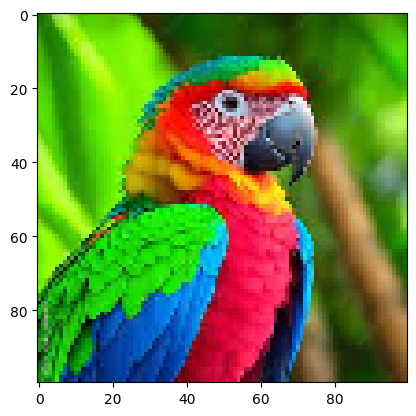

In [10]:
# load an image and resize to 100*100
image = load_img('./parot.jpeg', target_size=(100, 100))

plt.imshow(image)

In [32]:
# image to array
img = img_to_array(image)
print(img.shape)
print(img.max())

(100, 100, 3)
255.0


In [33]:
img2 = np.expand_dims(img, axis=0)
print(img2.shape)

(1, 100, 100, 3)


In [34]:
# prepare to Conv2D
img = img.reshape((1, img.shape[0], img.shape[1], img.shape[2]))
print(img.shape)

(1, 100, 100, 3)


In [36]:
in_shape = img.shape[1:]
# sequential model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=in_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

# fully connected layers
model.add(Dense(128, activation='relu'))

# summarize model
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 98, 98, 32)        896       


                                                                 
 max_pooling2d_3 (MaxPooling  (None, 49, 49, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 21, 21, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 10, 10, 128)      0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 12800)             0         
          

In [60]:
layer_idx = 5
md = Model(inputs=model.inputs, outputs=model.layers[layer_idx].output)
feature_maps = md.predict(img)
print(feature_maps.shape)
f_min, f_max = feature_maps.min(), feature_maps.max()
feature_maps = (feature_maps - f_min) / (f_max - f_min)
feature_maps.min(), feature_maps.max()

1/1 [==============================] - 0s 27ms/step
(1, 10, 10, 128)


(0.0, 1.0)

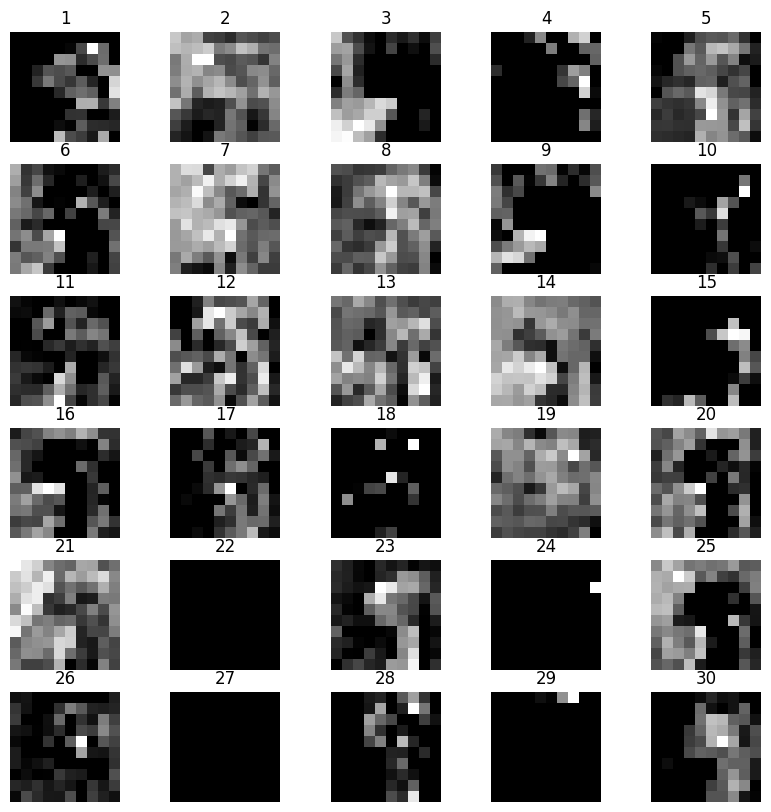

In [61]:
nplots = 30

fig = plt.figure(figsize=(10, 10))
for i in range(nplots):
    ax = fig.add_subplot(6, 5, i+1)
    ax.imshow(feature_maps[0, :, :, i], cmap='gray')
    ax.axis('off')
    plt.title(i+1)